<a href="https://colab.research.google.com/github/iPrinka/MITx-Micromasters-Statistics-Data-Science/blob/main/oneleague_ml_w5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to PyTorch

**OBJECTIVES**

- Introduce `pytorch` and tensors
- Use `pytorch` to build basic regression models
- Implement basic linear regression with `pytorch`


#### Modeling Review

In [17]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR 
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline

import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

import torch

**PROBLEM**: Use the diabetes data and description below to build and compare regression models using `sklearn`. (`LinearRegression`, `Ridge`, and `SVR`)  Identify a model that returns the lowest Mean Squared Error.

In [2]:
diabetes = load_diabetes()

In [3]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [4]:
X, y = diabetes.data, diabetes.target

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 22)

In [6]:
from sklearn.metrics import mean_squared_error

In [19]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)
y_pred = lin_reg_model.predict(X_test)
mean_squared_error(y_test, y_pred)

3180.500140787191

In [25]:
ridge_model = Ridge(random_state = 42, alpha=.1)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
mean_squared_error(y_test, y_pred)

3177.0975665792726

In [21]:
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred = svr_model.predict(X_test)
mean_squared_error(y_test, y_pred)

5256.9021760559435

**Neural Net Aside**

- [Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.67022&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

### `pytorch` tensors - similar to numpy arrays with extra features

In [ ]:
# !pip install torch -U

In [26]:
import torch
import torch.nn as nn

In [27]:
#create a weight and bias vector
w = torch.tensor(3.0, requires_grad = True)
b = torch.tensor(1.0, requires_grad = True)

In [28]:
#look at the weight
w

tensor(3., requires_grad=True)

In [29]:
#feed it forward
def feedforward(x):
   return w*x + b

In [30]:
#create input
x = torch.tensor([[5], [2]])

In [31]:
#evaluate
feedforward(x)

tensor([[16.],
        [ 7.]], grad_fn=<AddBackward0>)

### The Simple Linear Model

In [33]:
#set random seed
torch.manual_seed(3)

#basic linear model
model = nn.Linear(in_features = 1, out_features = 1)

#print the model
print(model.bias, model.weight)

Parameter containing:
tensor([-0.7889], requires_grad=True) Parameter containing:
tensor([[-0.9915]], requires_grad=True)


In [35]:
#input
x = torch.tensor([3.0])
#pass to model
model(x)

tensor([-3.7633], grad_fn=<AddBackward0>)

Now, we will create a class that inherits from the `nn.Module` and will implement our regression forward pass.

In [37]:
#linear regression class
class LinearRegression(nn.Module):

  def __init__(self, num_features, output_size):
    super().__init__()
    self.linear = nn.Linear(num_features, output_size)

  def feedforward(self, x):
    return self.linear(x)

In [38]:
#seed and pass input 2, 1
torch.manual_seed(22)
lr = LinearRegression(1, 1)

In [40]:
#look at the parameters
list(lr.parameters())

[Parameter containing:
 tensor([[-0.2682]], requires_grad=True), Parameter containing:
 tensor([0.4050], requires_grad=True)]

In [41]:
#create an input
x = torch.tensor([5.1])

In [42]:
#feed it forward
lr.feedforward(x)

tensor([-0.9628], grad_fn=<AddBackward0>)

### Synthetic Dataset

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [44]:
#create X and y
X = torch.randn(100, 1)*10
y = X + torch.randn(100, 1)*3

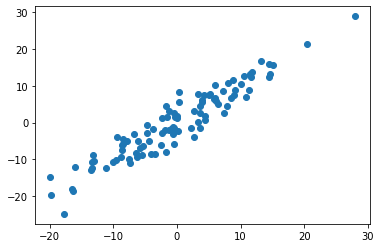

In [45]:
#scatter
plt.scatter(X,y)

In [46]:
#look at our parameters
list(lr.parameters())

[Parameter containing:
 tensor([[-0.2682]], requires_grad=True), Parameter containing:
 tensor([0.4050], requires_grad=True)]

In [48]:
#save as w, b
[w, b] = lr.parameters()

In [49]:
#function to get parameters
def get_params():
  return w[0][0].item(), b[0].item()

In [50]:
#function for plotting fit
def plot_model_fit():
  w1, b1 = get_params()
  x1 = np.array([-20, 30])
  y1 = w1*x1 + b1
  plt.plot(x1, y1, '--r')
  plt.scatter(X, y)

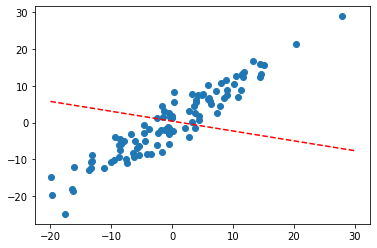

In [51]:
#plot it
plot_model_fit()

### Improving the Fit

$$(y - (wx + b))^2$$

Choose $w$ to minimize error.

$$w_1 = w_0 - \alpha f'(w)$$

In [ ]:
#initial weight and intercept


In [ ]:
#compute the loss for (x = -3)


In [ ]:
#examine it


In [ ]:
#derivative of loss


In [ ]:
#examine it


In [ ]:
#update weight


Typically we also have bias term and update according to gradients.

$$m_1 = m_0 - \alpha f'(m)$$
$$b_1 = b_0 - \alpha f'(b)$$

### Implementing in PyTorch

In [ ]:
#class for regression


In [ ]:
#seed and make data


In [ ]:
#instantiate the model


In [57]:
lr = LinearRegression(1, 1)

In [58]:
#set the loss
loss = nn.MSELoss()

In [59]:
#set the optimizer
optimizer = torch.optim.SGD(lr.parameters(), lr = 0.01)

In [60]:
#train it
epochs = 100
losses = []

for i in range(epochs):
    #feed data forward
    y_hat = lr.feedforward(X)
   
    #compute the loss
    l = loss(y_hat, y)
    if i%10 == 0:
      print(f'Epoch {i}, loss: {l.item()}')
    losses.append(l)
    optimizer.zero_grad() #zeroing out to not consider the accummulated gradient
    l.backward() # computing new gradients
    optimizer.step() # sgd using computed gradients

Epoch 0, loss: 10.47205924987793
Epoch 10, loss: 9.372743606567383
Epoch 20, loss: 9.317272186279297
Epoch 30, loss: 9.280318260192871
Epoch 40, loss: 9.255642890930176
Epoch 50, loss: 9.239168167114258
Epoch 60, loss: 9.228167533874512
Epoch 70, loss: 9.22082233428955
Epoch 80, loss: 9.215917587280273
Epoch 90, loss: 9.212642669677734


In [65]:
#plot the losses
plt.line(losses)

AttributeError: ignored

In [62]:
#examine the fit
w, b = lr.parameters()

In [63]:
#weight
w

Parameter containing:
tensor([[0.9860]], requires_grad=True)

In [64]:
#bias
b

Parameter containing:
tensor([0.2833], requires_grad=True)

### Using with Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sscaler = StandardScaler()

In [ ]:
x_train = torch.tensor(X_train, dtype = torch.float)
x_test = torch.tensor(X_test, dtype = torch.float)
y_train = torch.tensor(y_train, dtype = torch.float).reshape(-1, 1)
y_test = torch.tensor(y_test, dtype = torch.float).reshape(-1, 1)

In [ ]:
model = nn.Sequential(
            nn.Linear(x_train.shape[1], 200),
            nn.Linear(200, 1))

In [ ]:
model(x_train)

In [ ]:
loss = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [ ]:
epochs = 1000
losses = []
for i in range(epochs):
    y_pred = model(x_train)
    l = loss(y_pred, y_train)
    if i%100 == 0:
        print(f'epoch {i}, loss: {l.item()}')
    losses.append(l)
    optimizer.zero_grad()
    l.backward()
    optimizer.step()

In [ ]:
with torch.no_grad():
    preds = model(x_test)

In [ ]:
mean_squared_error(y_test, np.array(preds))

#### Problem

Modeling Medical Costs

The dataset comes from [kaggle](https://www.kaggle.com/datasets/mirichoi0218/insurance?resource=download) and contains information about medical costs.  You can access the data through your google drive or simply upload it to your session in colab -- [link](https://drive.google.com/file/d/1n2qVWbZ5QRi-NX4S_D_vmxiSxIDUaiUU/view?usp=sharing).

Build a model with `pytorch` to predict medical costs.  Compare its performance to models using `sklearn` including `LinearRegression` and `Ridge`.

In [ ]:
df = pd.read_csv('insurance.csv')

In [ ]:
df.head()

In [ ]:
df.info()

### Classification

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
cancer = load_breast_cancer()

In [ ]:
X = cancer.data
y = cancer.target

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sscaler = StandardScaler()

In [ ]:
X = sscaler.fit_transform(X)

In [ ]:
#classifier class


In [ ]:
#instantiate it


In [ ]:
#move from numpy


In [ ]:
#function for training


In [ ]:
#reshaping y


In [ ]:
#optimizer


In [ ]:
#train it


In [ ]:
#make predictions


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
#look at confusion matrix


### Pretrained Network

In [ ]:
from torchvision import models

In [ ]:
#models available
dir(models)

In [ ]:
from PIL import Image

In [ ]:
#read in using PIL
dog = Image.open('data/len_2.jpg')

In [ ]:
#take a peek
plt.imshow(dog)
plt.title('Lenny')
plt.axis('off');

In [ ]:
#bring in resnet
resnet = models.resnet101(pretrained = True)
#resnet.eval()

In [ ]:
from torchvision import transforms

In [ ]:
#preprocess image
preprocess = transforms.Compose([transforms.ToTensor(),
                                 transforms.Normalize(
                                 mean = [0.485, .456, .406],
                                 std=[0.229, 0.224, 0.225])])


In [ ]:
#preprocess the dog
lenny = preprocess(dog)
#lenny2 = preprocess(dog2)

In [ ]:
#dimension fix
batch_lenny = torch.unsqueeze(lenny, 0)

In [ ]:
#pass in image
out = resnet(batch_lenny)

In [ ]:
#labels of imagenet classes
with open('data/imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

In [ ]:
#highest probability
_, index = torch.max(out, 1)

In [ ]:
#change output to percent
percent = torch.nn.functional.softmax(out, dim=1)[0]*100
labels[index[0]], percent[index[0]].item()

In [ ]:
_, indices = torch.sort(out, descending = True)
[(labels[idx], percent[idx].item()) for idx in indices[0][:10]]

### `deeplabv2_resnet101`

A second model that performs semantic segmentation.  Here, we aim at each pixel and use the pretrained classes to identify whether pixels are part of these categories. 

In [ ]:
model = torch.hub.load('pytorch/vision:v0.6.0', 'deeplabv3_resnet101', pretrained=True)

In [ ]:
#set to evaluation mode so channels are not an issue
model.eval()
with torch.no_grad():
    outtie = model(batch_lenny)

In [ ]:
outtie.keys()

In [ ]:
output_preds = outtie['out'][0].argmax(0)

In [ ]:
palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
colors = (colors % 255).numpy().astype("uint8")

In [ ]:
# plot the semantic segmentation predictions of 21 classes in each color
lenny_segments = Image.fromarray(output_preds.byte().cpu().numpy()).resize(dog.size)
lenny_segments.putpalette(colors)

In [ ]:
plt.imshow(lenny_segments)
plt.axis('off');
plt.title('Bucket Head Lenny');

### More pretrained models

- [Torchvision models: Semantic Segmentation](https://pytorch.org/vision/0.8/models.html#semantic-segmentation)

- [Basic Convnet with Pytorch](https://pytorch.org/tutorials/recipes/recipes/defining_a_neural_network.html)